YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


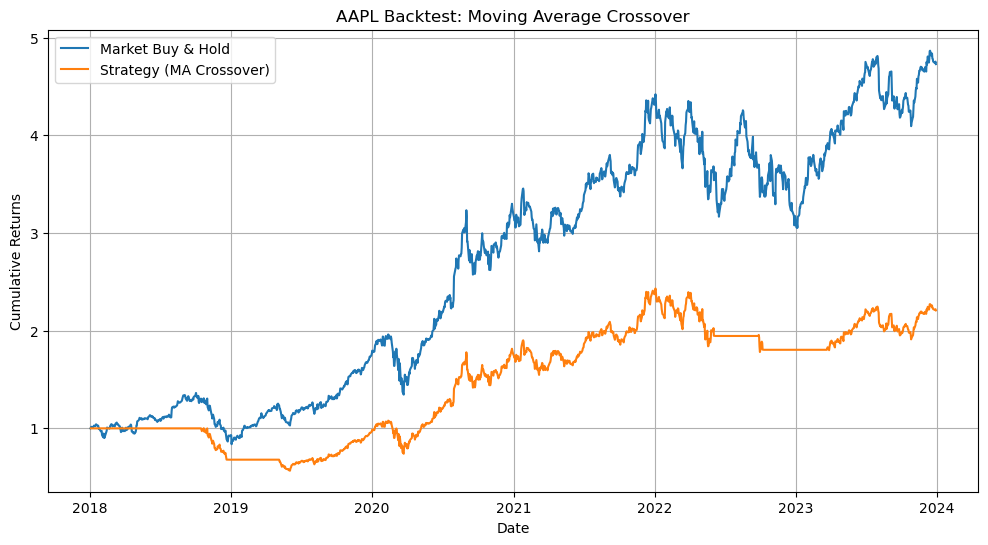

Strategy Sharpe Ratio: 0.62
Market Sharpe Ratio: 0.98
Final Strategy Return: 120.74%
Final Market Return: 372.78%


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
symbol = 'AAPL'  # Apple stock
start_date = '2018-01-01'
end_date = '2024-01-01'
short_window = 50
long_window = 200
transaction_cost = 0.001  # 0.1% per trade

# Fetch data
data = yf.download(symbol, start=start_date, end=end_date)
data = data[['Close']]

# Generate signals
data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window).mean()
data['Signal'] = 0

data.loc[data['Short_MA'] > data['Long_MA'], 'Signal'] = 1

data['Position'] = data['Signal'].shift(1)  # Trade on next day

# Calculate returns
data['Market_Returns'] = data['Close'].pct_change()
data['Strategy_Returns'] = data['Market_Returns'] * data['Position']

# Apply transaction costs
trade_signals = data['Position'].diff().abs()
data['Strategy_Returns_TC'] = data['Strategy_Returns'] - trade_signals * transaction_cost

# Calculate cumulative returns
data['Market_Cumulative'] = (1 + data['Market_Returns']).cumprod()
data['Strategy_Cumulative'] = (1 + data['Strategy_Returns_TC']).cumprod()

# Performance metrics
def sharpe_ratio(returns, risk_free_rate=0.0):
    excess_returns = returns - risk_free_rate / 252
    return np.sqrt(252) * excess_returns.mean() / returns.std()

strategy_sharpe = sharpe_ratio(data['Strategy_Returns_TC'].dropna())
market_sharpe = sharpe_ratio(data['Market_Returns'].dropna())

# Visualization
plt.figure(figsize=(12,6))
plt.plot(data['Market_Cumulative'], label='Market Buy & Hold')
plt.plot(data['Strategy_Cumulative'], label='Strategy (MA Crossover)')
plt.title(f"{symbol} Backtest: Moving Average Crossover")
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Strategy Sharpe Ratio: {strategy_sharpe:.2f}")
print(f"Market Sharpe Ratio: {market_sharpe:.2f}")
print(f"Final Strategy Return: {data['Strategy_Cumulative'].iloc[-1] - 1:.2%}")
print(f"Final Market Return: {data['Market_Cumulative'].iloc[-1] - 1:.2%}")
